# Regressão Linear

Implementação da Regressão Linear baseada na otimização dos parâmetros com gradiente descendente.

## Dataset

O conjunto de dados foi gerado através do make_regression do pacote de datasets do sklearn com um número de samples variável e parametrizado na célula de informações sobre o dataset. Configurando o parâmetro 'noise' da função make_regression, podemos modificar a medida de dispersão dos dados e testar o modelo.

## Modelo

Para fins de visualização da equação gerada, utilizamos apenas 2 features, mas, o modelo foi implementado de forma vetorizada para até n features. Para verificar o processo de aprendizado do modelo com mais features, podemos visualizar o histórico de custos referente a cada iteração em nossa função de hipótese.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

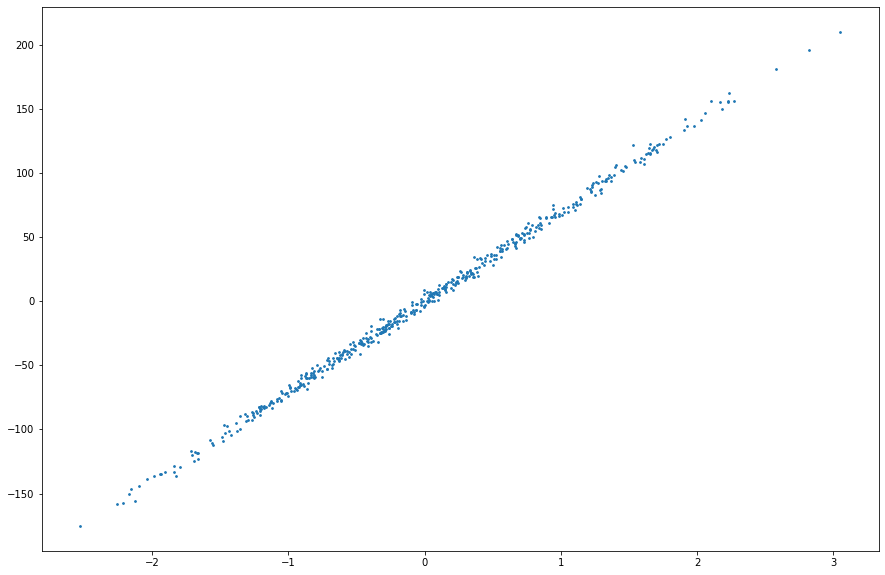

In [349]:
from sklearn.datasets import make_regression

m = 500

X, y = make_regression(n_samples=m, n_features=2, noise=0)
X[:,0] = 1
y = np.reshape(y, (m,1))

plt.figure(figsize=(15,10))
plt.scatter(X[:,1],y, s=3)
plt.show()

## Regressão Linear

In [374]:
class LinearRegression():
    def __init__(self, n_x, iterations=2500):
        self.theta = np.random.randn(n_x, 1)
        self.costs_history = []
        self.iterations = iterations

    def get_thetas(self):
        return self.theta

    def initialize_parameters(self, n_x):
        self.theta = np.random.randn(n_x, 1)
        self.costs_history = []

    def cost_function(self, X, y):
        h_theta = np.dot(X, self.theta)
        delta = (h_theta - y)**2
        delta = np.sum(delta)
        j = (1/(2*m)) * delta
        return j

    def gradient_descent(self, X, y, learning_rate=0.000005, print_cost=True):
        
        for itr in range(self.iterations):
            hypothesis = np.dot(X, self.theta)
            
            dtheta = (hypothesis - y)*X
            dtheta = dtheta.sum(axis=0).reshape((X.shape[1],1))
            
            self.theta = self.theta - (learning_rate*dtheta)
            cost = self.cost_function(X,y)
            self.costs_history.append(cost)
            if print_cost and itr % 100 == 0:
                print ("Cost after iteration %i: %f" %(itr, cost))
    
    def fit(self, X, y, print_cost=True):
        n_x = X.shape[1]
        self.initialize_parameters(n_x)
        self.gradient_descent(X,y, print_cost=print_cost)
    
    def predict(self, x):
        return np.dot(x, self.theta)

## Treino do modelo

In [376]:
iterations = 3000
n_x = X.shape[1]

lr = LinearRegression(n_x, iterations=iterations)
lr.fit(X,y, print_cost=True)

Cost after iteration 0: 2404.228073
Cost after iteration 100: 1485.435786
Cost after iteration 200: 918.544532
Cost after iteration 300: 568.773091
Cost after iteration 400: 352.963336
Cost after iteration 500: 219.807595
Cost after iteration 600: 137.649421
Cost after iteration 700: 86.956924
Cost after iteration 800: 55.678952
Cost after iteration 900: 36.379924
Cost after iteration 1000: 24.472051
Cost after iteration 1100: 17.124631
Cost after iteration 1200: 12.591092
Cost after iteration 1300: 9.793775
Cost after iteration 1400: 8.067747
Cost after iteration 1500: 7.002732
Cost after iteration 1600: 6.345580
Cost after iteration 1700: 5.940094
Cost after iteration 1800: 5.689893
Cost after iteration 1900: 5.535508
Cost after iteration 2000: 5.440246
Cost after iteration 2100: 5.381465
Cost after iteration 2200: 5.345194
Cost after iteration 2300: 5.322813
Cost after iteration 2400: 5.309003
Cost after iteration 2500: 5.300481
Cost after iteration 2600: 5.295223
Cost after iterati

## Eficácia do Modelo
Visualização da eficácia do modelo após o processo de aprendizagem sobre os dados.

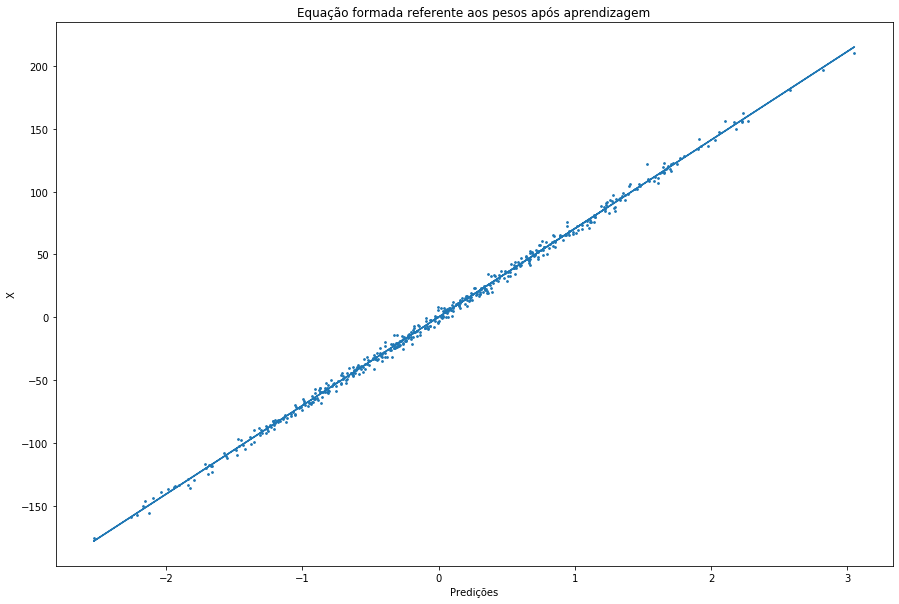

In [378]:
plt.figure(figsize=(15,10))
plt.scatter(X[:,1],y, s=3)

y_hat = lr.predict(X)
plt.plot(X[:,1], y_hat)
plt.title('Equação formada referente aos pesos após aprendizagem')
plt.xlabel('Predições')
plt.ylabel('X')
plt.show()

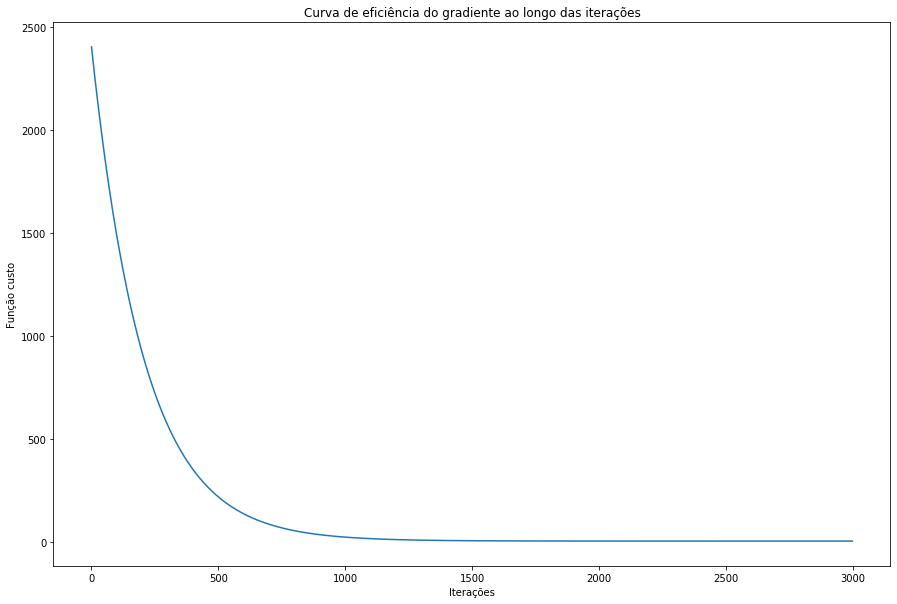

In [379]:
plt.figure(figsize=(15,10))
plt.plot(range(iterations), lr.costs_history)
plt.title('Curva de eficiência do gradiente ao longo das iterações')
plt.ylabel('Função custo')
plt.xlabel('Iterações')
plt.show()